In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
r= pd.read_csv("regime_list.csv")

print(r.shape)

print(r.dtypes)

r

(629, 6)
cowcode            int64
gwf_country       object
gwf_casename      object
gwf_startdate     object
gwf_enddate       object
gwf_regimetype    object
dtype: object


,cowcode,gwf_country,gwf_casename,gwf_startdate,gwf_enddate,gwf_regimetype
0,2,USA,USA9/1/1787,3/4/1789,12/31/2020,presidential
1,20,Canada,Canada11668,12/11/1931,12/31/2020,parliamentary
2,31,Bahamas,Bahamas6/30/1973,6/30/1973,12/31/2020,parliamentary
3,40,Cuba,Cuba12298,10/10/1940,3/10/1952,presidential
4,40,Cuba,Cuba19063,3/10/1952,1/1/1959,personal
...,...,...,...,...,...,...
624,970,Nauru,Nauru,1/31/1968,12/31/2020,parliamentary
625,983,Marshall Islands,Marshall Islands,10/1/1979,12/31/2020,presidential
626,986,Palau,Palau,1/1/1981,12/31/2020,presidential
627,987,Micronesia,Micronesia,5/11/1979,12/31/2020,parliamentary


In [23]:
filtered_r = r[r['gwf_enddate'] == '12/31/2020']
new_r = filtered_r.drop(['cowcode', 'gwf_casename'], 1)
new_r.head()


<ipython-input-23-40cd6ff81cb1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_r = filtered_r.drop(['cowcode', 'gwf_casename'], 1)


,gwf_country,gwf_startdate,gwf_enddate,gwf_regimetype
0,USA,3/4/1789,12/31/2020,presidential
1,Canada,12/11/1931,12/31/2020,parliamentary
2,Bahamas,6/30/1973,12/31/2020,parliamentary
5,Cuba,1/1/1959,12/31/2020,party-personal
23,Haiti,2/7/2017,12/31/2020,presidential


In [22]:
#new_r['gwf_regimetype'] = new_r.gwf_regimetype.map({'presidential': 1, 'parliamentary': 0, 'personal':0})
#new_r.head()

,gwf_country,gwf_startdate,gwf_enddate,gwf_regimetype
0,USA,3/4/1789,12/31/2020,1.0
1,Canada,12/11/1931,12/31/2020,0.0
2,Bahamas,6/30/1973,12/31/2020,0.0
5,Cuba,1/1/1959,12/31/2020,NaN
23,Haiti,2/7/2017,12/31/2020,1.0


In [27]:
new_r.loc[new_r.gwf_regimetype != 'presidential', 'gwf_regimetype'] = 0
new_r.loc[new_r.gwf_regimetype == 'presidential', 'gwf_regimetype'] = 1
new_r

,gwf_country,gwf_startdate,gwf_enddate,gwf_regimetype
0,USA,3/4/1789,12/31/2020,1
1,Canada,12/11/1931,12/31/2020,0
2,Bahamas,6/30/1973,12/31/2020,0
5,Cuba,1/1/1959,12/31/2020,0
23,Haiti,2/7/2017,12/31/2020,1
...,...,...,...,...
624,Nauru,1/31/1968,12/31/2020,0
625,Marshall Islands,10/1/1979,12/31/2020,1
626,Palau,1/1/1981,12/31/2020,1
627,Micronesia,5/11/1979,12/31/2020,0


In [28]:
new_r.to_csv('cleaned_regime.csv')

# EDA 

In [31]:
print("Data shape (rows, cols):")
print(new_r.shape)

Data shape (rows, cols):
(187, 4)


0    0.727273
1    0.272727
Name: gwf_regimetype, dtype: float64


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gwf_regimetype', ylabel='count'>

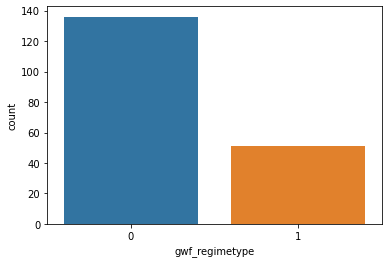

In [30]:
print(new_r.gwf_regimetype.value_counts()/new_r.gwf_regimetype.count())
sns.countplot(new_r.gwf_regimetype)

In [4]:
combined = pd.read_csv("RegimeQuality.csv")
print(combined.shape)

print(combined.dtypes)


(74, 16)
Unnamed: 0                          int64
Country                            object
cowcode                             int64
gwf_casename                       object
gwf_startdate                      object
gwf_enddate                        object
gwf_regimetype                      int64
Quality of Life Index             float64
Purchasing Power Index            float64
Safety Index                      float64
Health Care Index                 float64
Cost of Living Index              float64
Property Price to Income Ratio    float64
Traffic Commute Time Index        float64
Pollution Index                   float64
Climate Index                     float64
dtype: object


# Exploratory Data Analysis 

0    0.743243
1    0.256757
Name: gwf_regimetype, dtype: float64


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gwf_regimetype', ylabel='count'>

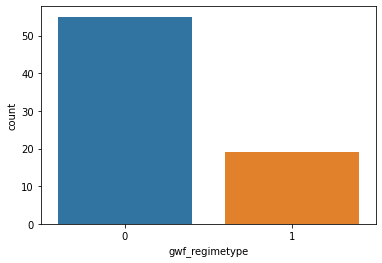

In [5]:
print(combined.gwf_regimetype.value_counts()/combined.gwf_regimetype.count())
sns.countplot(combined.gwf_regimetype)

In [17]:
combined.describe()

,Unnamed: 0,cowcode,gwf_regimetype,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,448.148649,0.256757,134.569459,59.757838,60.242162,64.448919,52.248919,12.669054,36.246622,52.458108,77.266216
std,21.505813,248.379553,0.439826,34.789706,27.700634,13.760092,9.464550,19.855768,6.082085,8.357267,21.074836,17.113927
min,1.000000,2.000000,0.000000,55.650000,13.520000,22.510000,42.800000,21.980000,2.790000,20.100000,11.550000,20.220000
25%,19.250000,240.000000,0.000000,106.012500,35.607500,52.967500,56.615000,37.360000,8.702500,30.042500,33.795000,68.082500
50%,37.500000,369.500000,0.000000,132.755000,53.390000,59.600000,65.680000,48.810000,11.115000,35.100000,55.305000,79.215000
75%,55.750000,685.000000,0.750000,162.860000,84.787500,70.685000,72.300000,67.275000,14.540000,39.775000,67.152500,91.910000
max,74.000000,920.000000,1.000000,192.670000,119.530000,88.140000,81.140000,122.400000,31.630000,61.080000,88.370000,99.790000


In [18]:
combined.corr()

,Unnamed: 0,cowcode,gwf_regimetype,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Unnamed: 0,1.000000,0.126391,0.049964,-0.009339,0.052447,0.047614,0.052308,0.032050,-0.049622,-0.014415,0.044550,-0.193802
cowcode,0.126391,1.000000,-0.351460,-0.265852,-0.075464,0.074469,-0.072114,-0.139983,0.214338,0.225951,0.338136,-0.338610
gwf_regimetype,0.049964,-0.351460,1.000000,-0.373320,-0.397664,-0.461547,-0.003618,-0.280902,0.398854,0.421736,0.218421,0.229165
Quality of Life Index,-0.009339,-0.265852,-0.373320,1.000000,0.854922,0.627971,0.623014,0.745653,-0.640034,-0.772462,-0.903713,0.052748
Purchasing Power Index,0.052447,-0.075464,-0.397664,0.854922,1.000000,0.468588,0.586836,0.786979,-0.589066,-0.562423,-0.700602,-0.174800
Safety Index,0.047614,0.074469,-0.461547,0.627971,0.468588,1.000000,0.308520,0.415116,-0.275794,-0.606072,-0.484716,-0.278673
Health Care Index,0.052308,-0.072114,-0.003618,0.623014,0.586836,0.308520,1.000000,0.569086,-0.170305,-0.280864,-0.553855,0.070646
Cost of Living Index,0.032050,-0.139983,-0.280902,0.745653,0.786979,0.415116,0.569086,1.000000,-0.398870,-0.473970,-0.680359,0.040536
Property Price to Income Ratio,-0.049622,0.214338,0.398854,-0.640034,-0.589066,-0.275794,-0.170305,-0.398870,1.000000,0.576500,0.427220,0.088352
Traffic Commute Time Index,-0.014415,0.225951,0.421736,-0.772462,-0.562423,-0.606072,-0.280864,-0.473970,0.576500,1.000000,0.644845,0.069200
